In [ ]:
import os
import shutil

root_path = '/content/'

# Переход в корневую директорию
os.chdir(root_path)

# @title Удаление всех папок и файлов в root_path
for file in os.listdir():
    file_path = os.path.join(root_path, file)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)
    except Exception as e:
        print(f"Failed to delete {file_path}. Reason: {e}")


In [ ]:
!nvidia-smi


Tue Dec 26 11:40:36 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)


/content


## **Установка YOLOv8**

In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image


## **Экспорт dataset из Roboflow**

In [ ]:
project_name = "urban-facilities"
version = 4

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9U6wTs9wcf5JpvaG6TPO")
project = rf.workspace("intership3").project("urban-facilities-fs08x")
dataset = project.version(4).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstal

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to urban-facilities-4 in yolov8:: 100%|██████████| 640/640 [00:00<00:00, 4217.92it/s]


## **Обучение модели**

In [ ]:
import shutil
import os

# @title Перемещение директории
src_path = f'/content/{project_name}-{version}/'
dst_path = '/content/datasets/'

# Проверка существования директории и создание, если отсутствует
if not os.path.exists(dst_path):
    os.makedirs(dst_path)

# Перемещение файлов
shutil.move(src_path, dst_path)

dataset_path = f'/content/datasets/{project_name}-{version}/'


In [ ]:
%cd {HOME}

# @title Обучение YOLOv8
!yolo task=segment mode=train model=yolov8m-seg.pt data={dataset_path}data.yaml epochs=300 plots=True


/content
100% 52.4M/52.4M [00:00<00:00, 305MB/s]
New https://pypi.org/project/ultralytics/8.0.229 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/datasets/urban-facilities-4/data.yaml, epochs=300, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=

In [ ]:
!ls {HOME}/runs/segment/train/


args.yaml					    labels_correlogram.jpg  train_batch0.jpg
BoxF1_curve.png					    labels.jpg		    train_batch1.jpg
BoxP_curve.png					    MaskF1_curve.png	    train_batch2.jpg
BoxPR_curve.png					    MaskP_curve.png	    val_batch0_labels.jpg
BoxR_curve.png					    MaskPR_curve.png	    val_batch0_pred.jpg
confusion_matrix_normalized.png			    MaskR_curve.png	    val_batch1_labels.jpg
confusion_matrix.png				    results.csv		    val_batch1_pred.jpg
events.out.tfevents.1703590919.96643a589caf.1989.0  results.png		    weights


/content


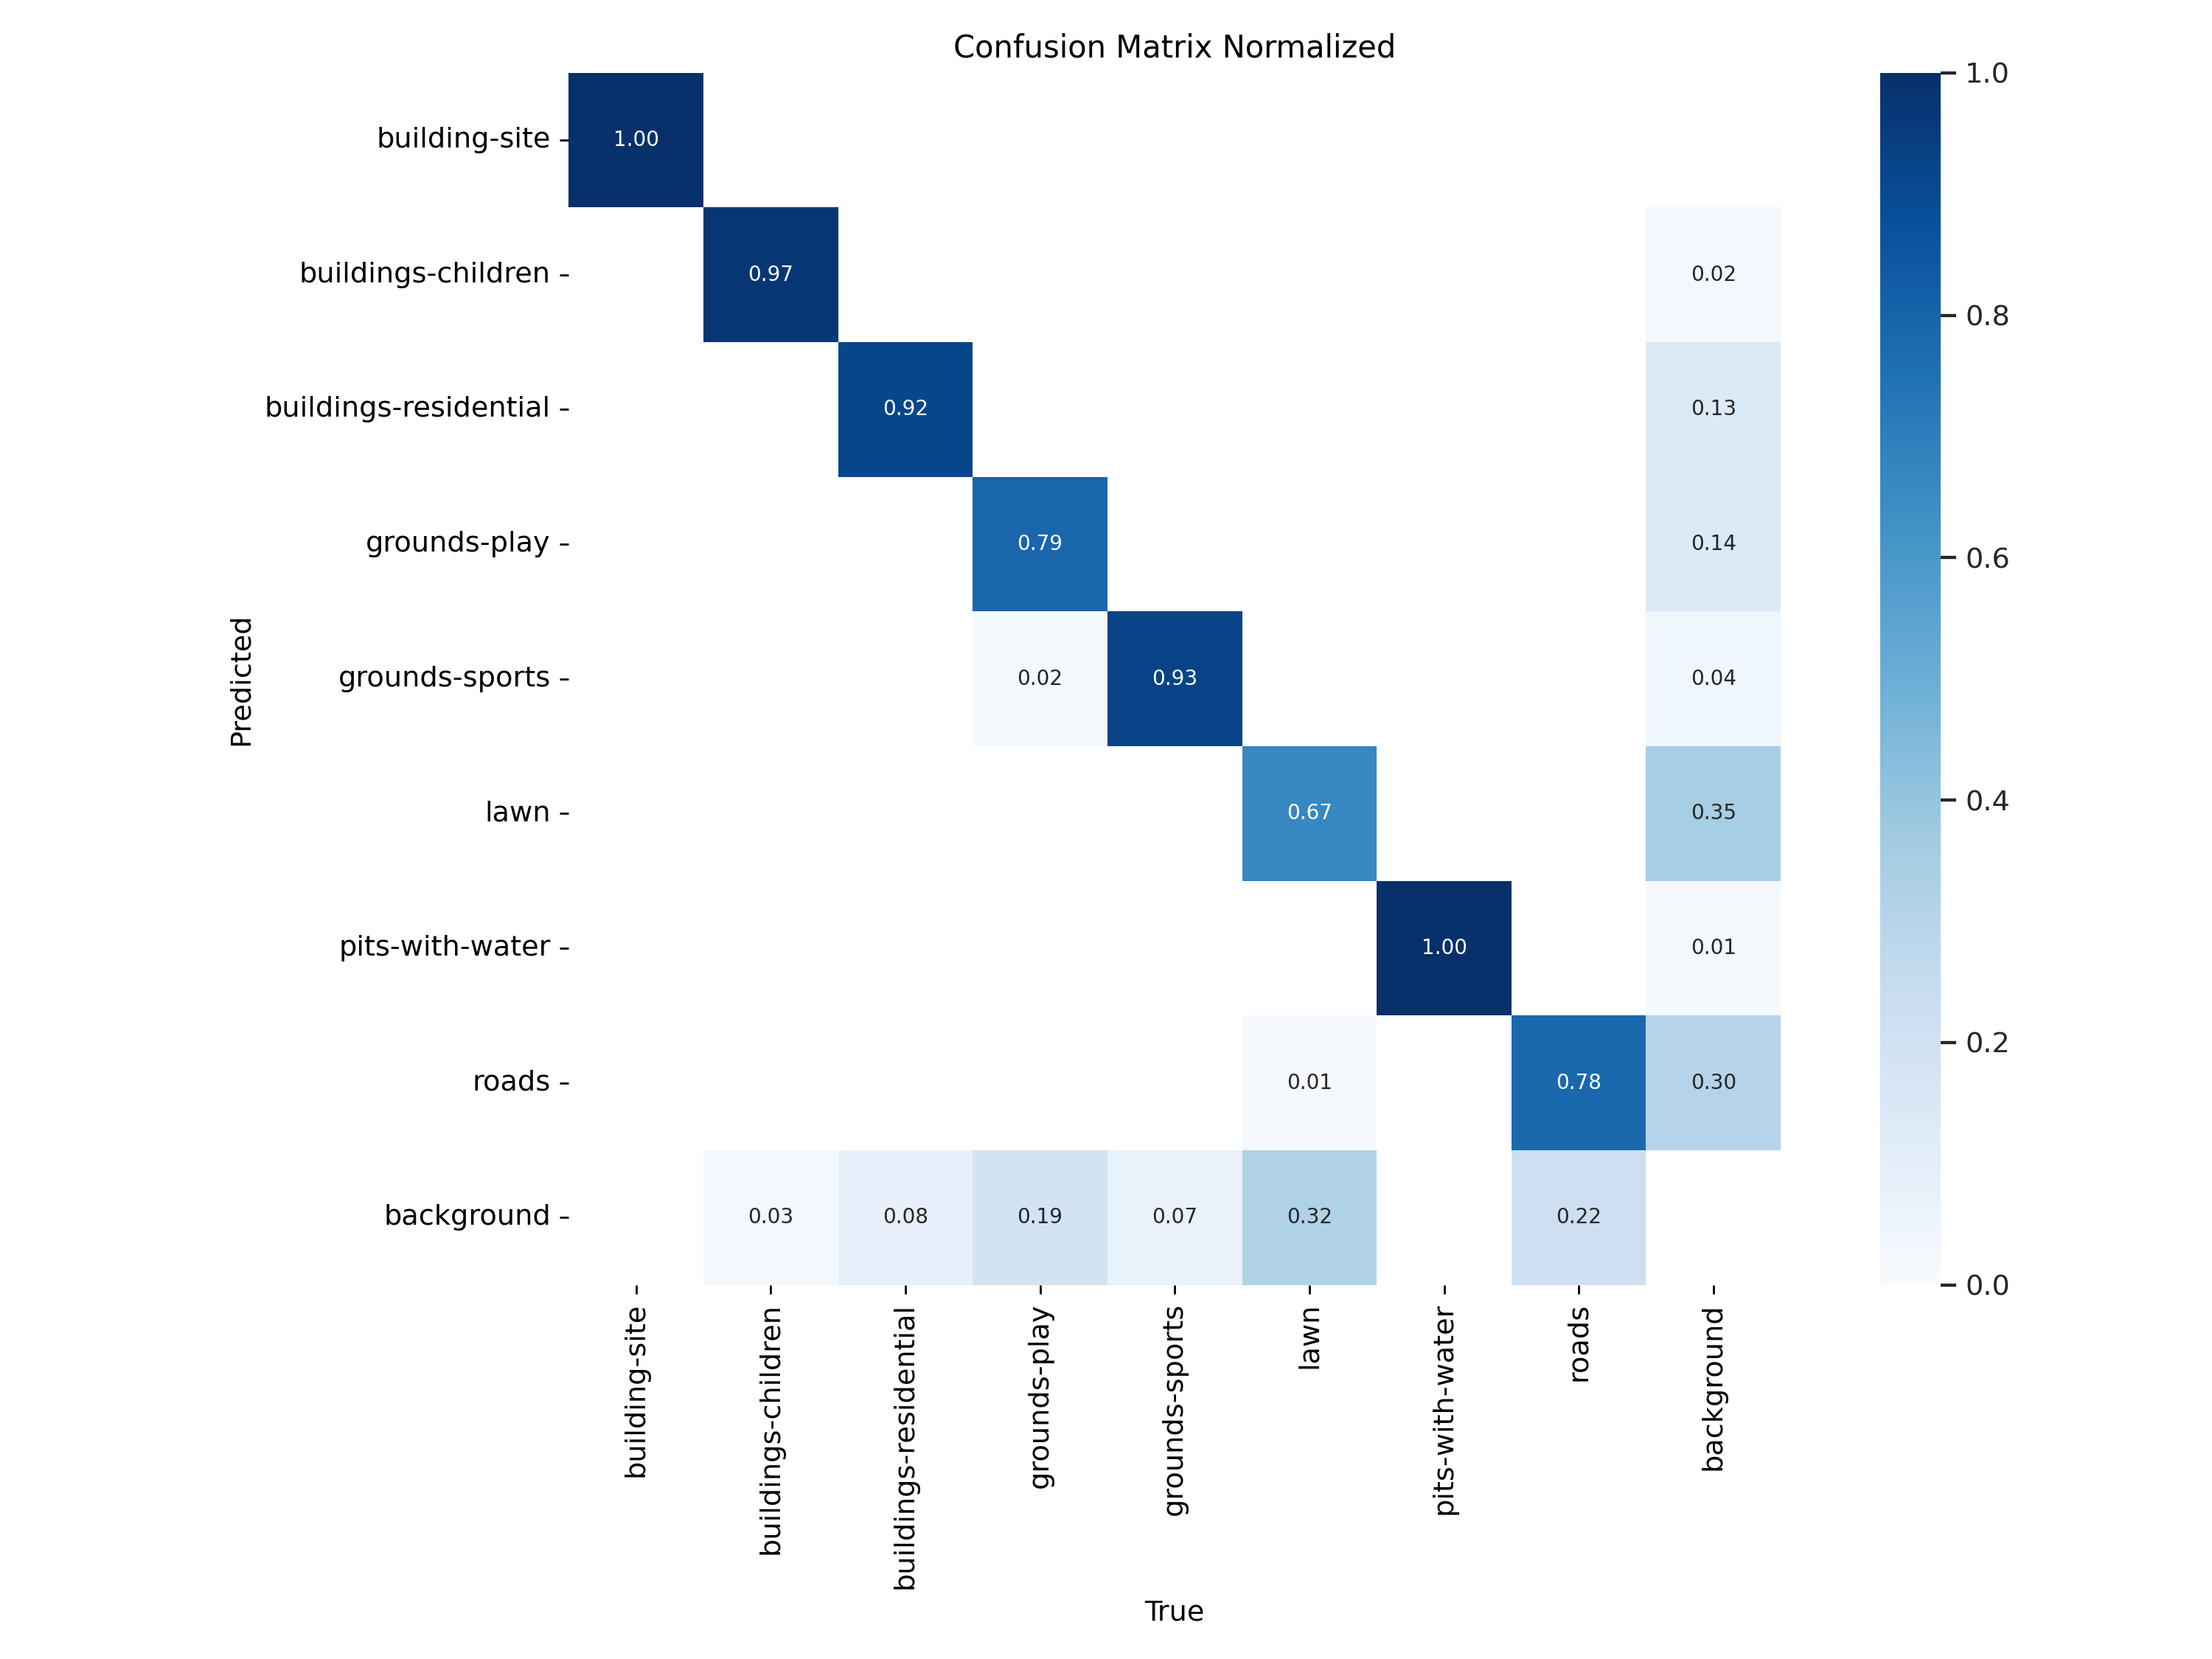

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix_normalized.png', width=1500)


/content


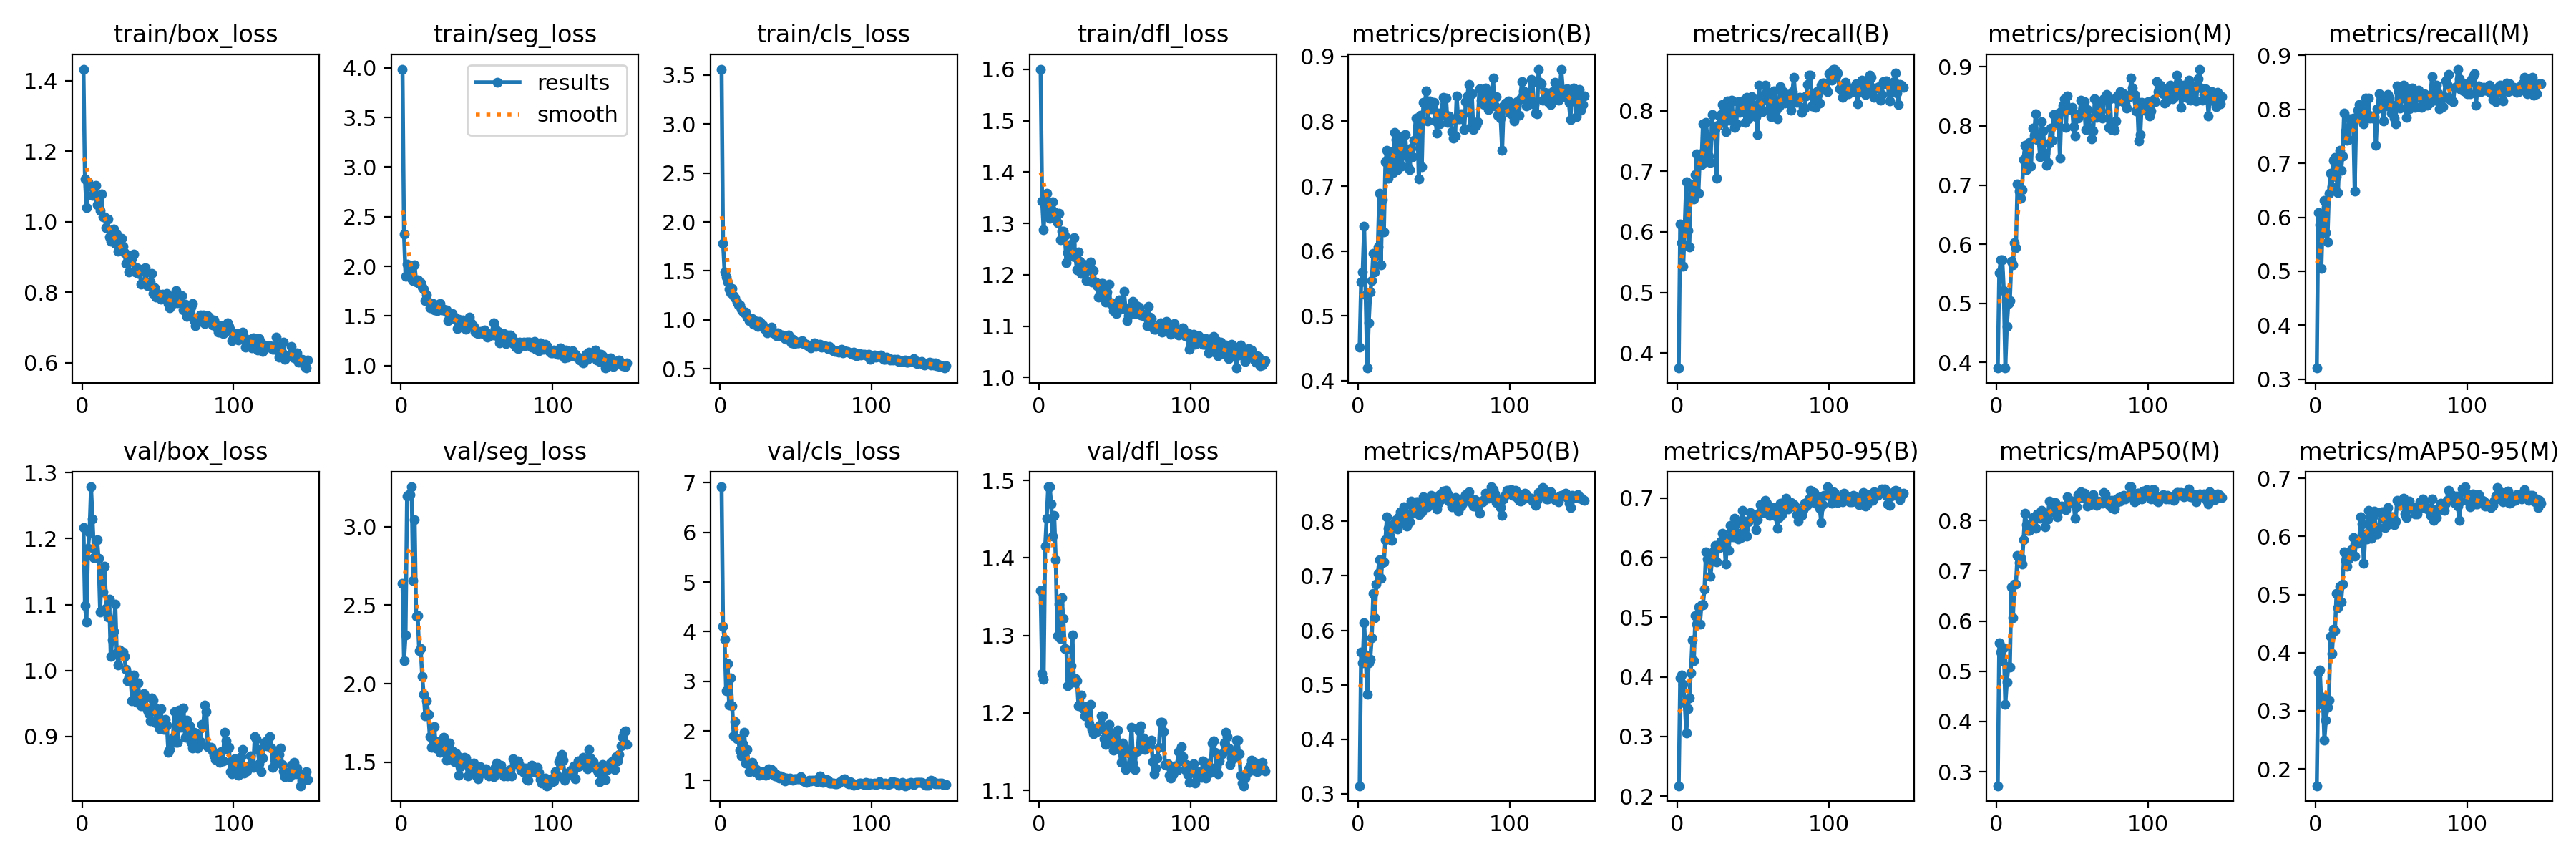

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/results.png', width=1500)


/content


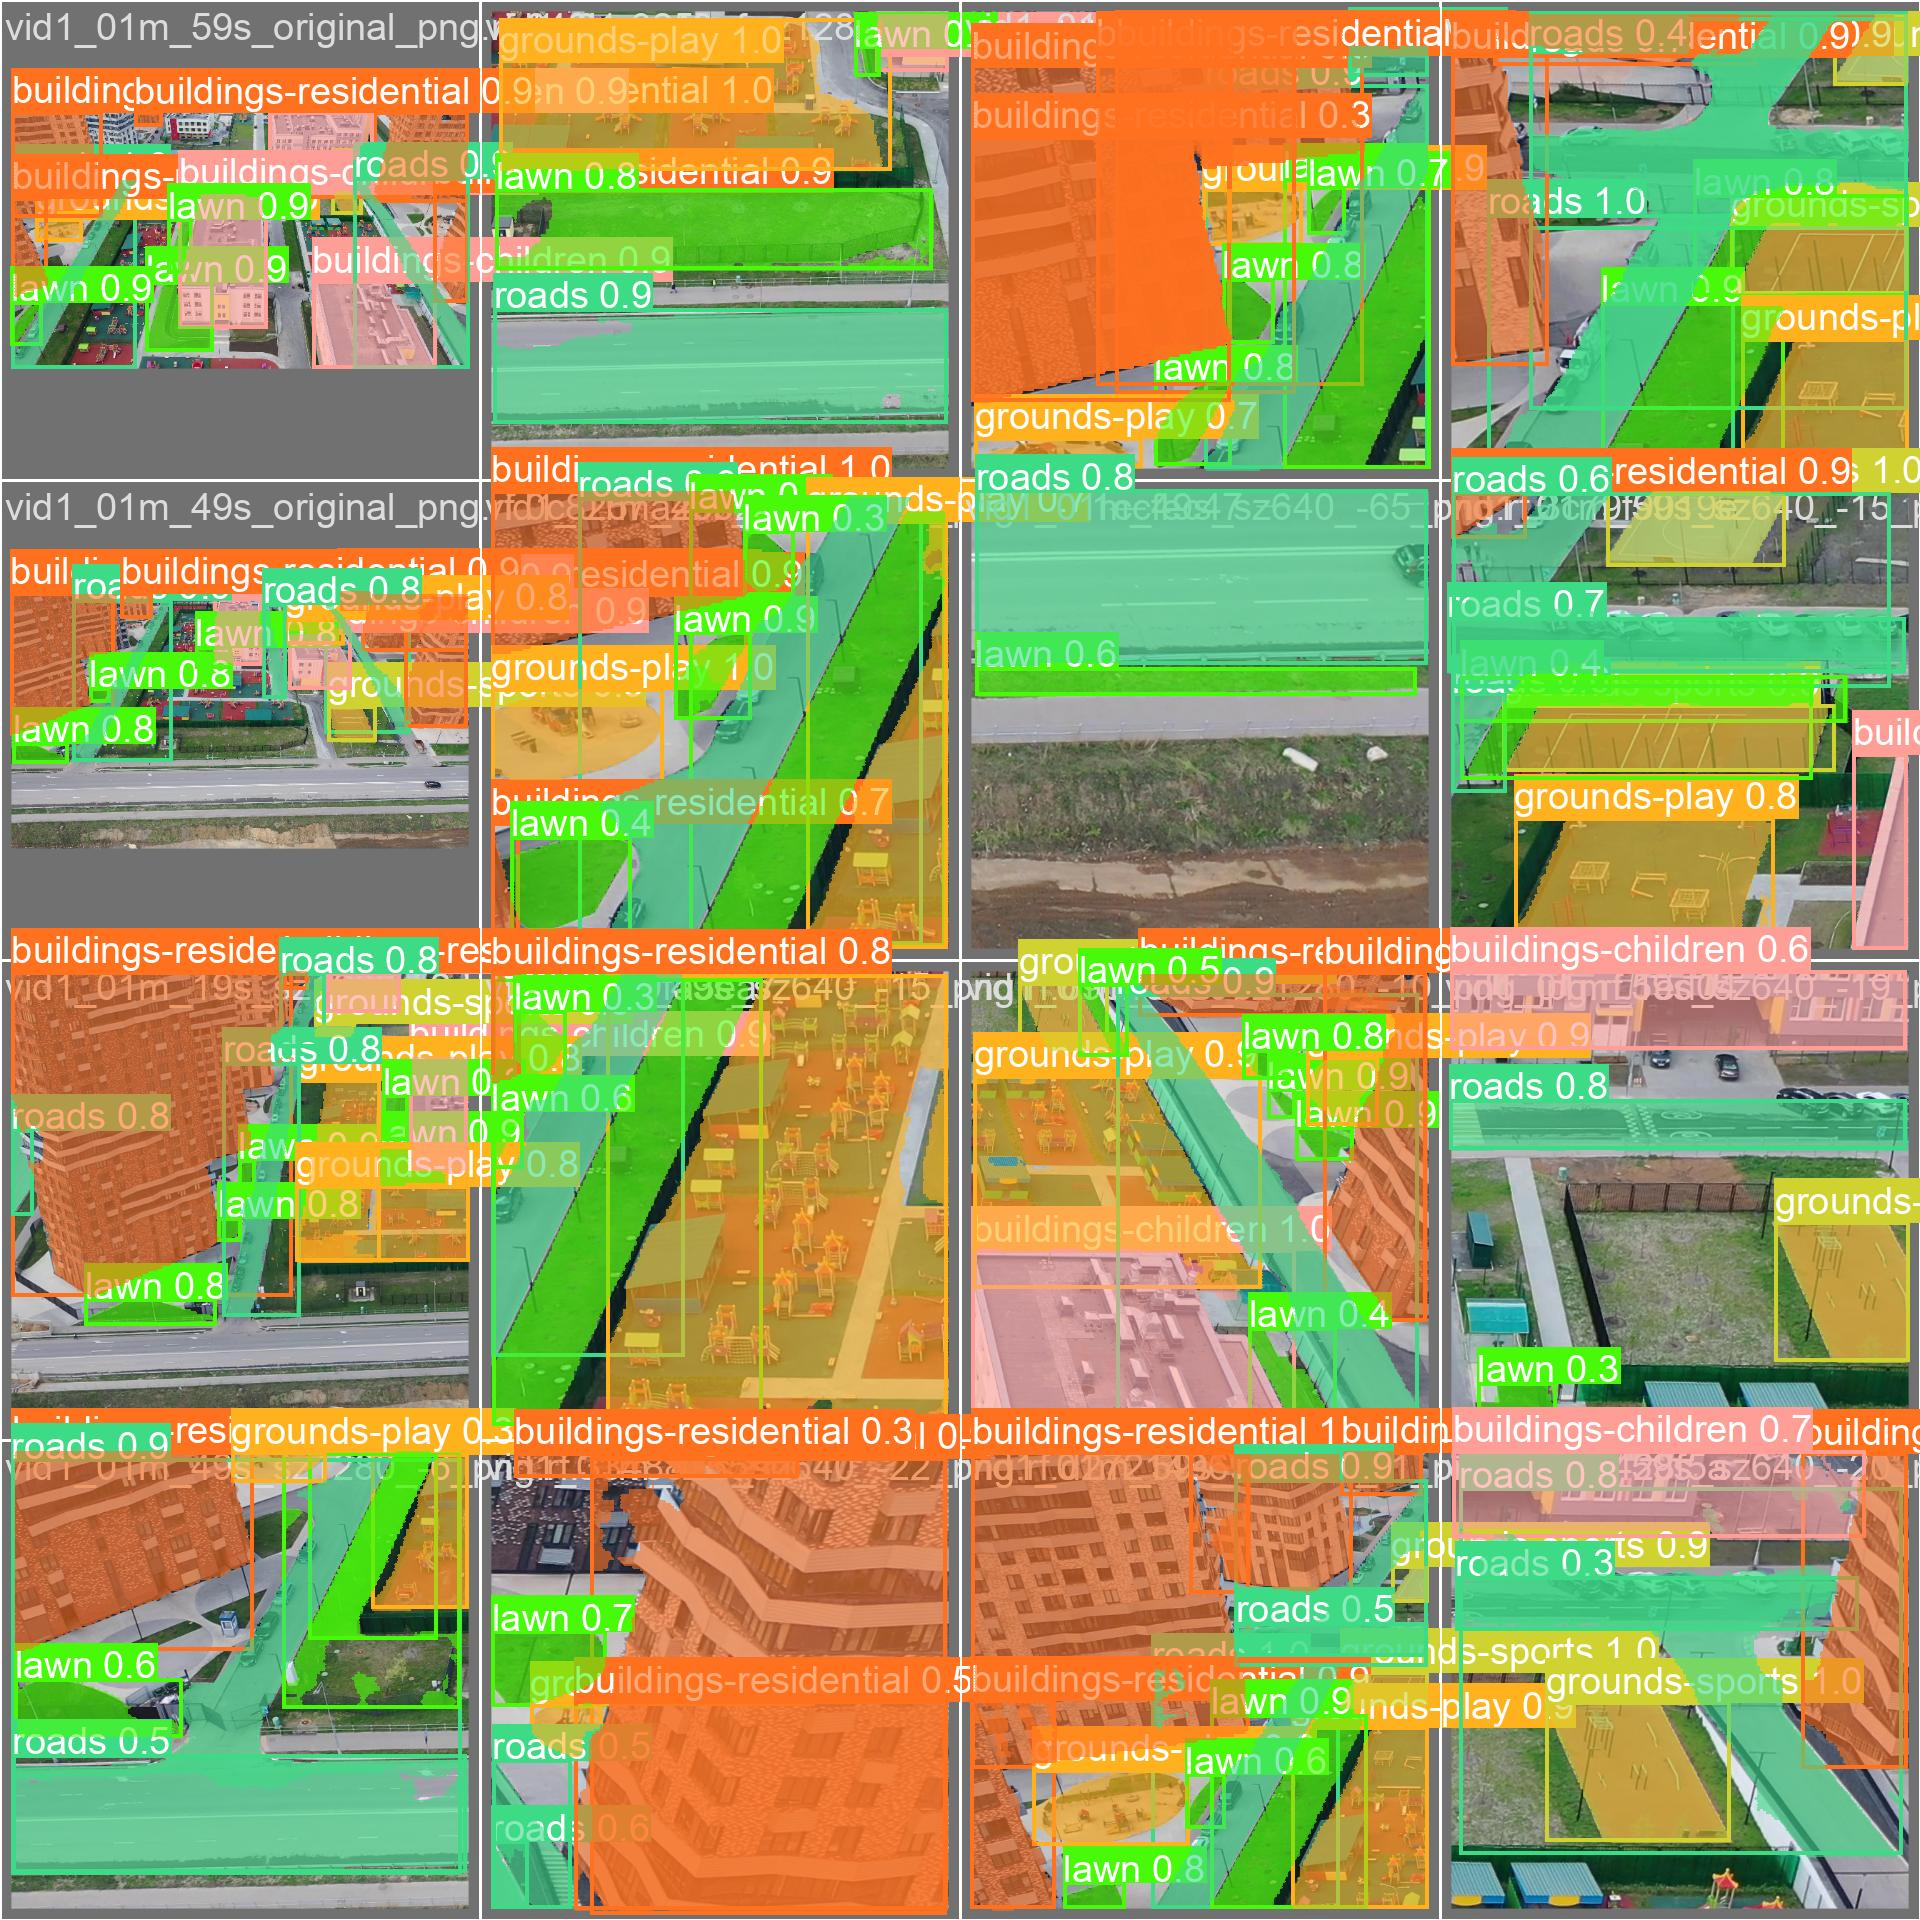

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch0_pred.jpg', width=1500)


## **Валидация модели**

In [ ]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset_path}data.yaml


/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27227016 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/datasets/urban-facilities-4/valid/labels.cache... 63 images, 0 backgrounds, 0 corrupt: 100% 63/63 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 4/4 [00:09<00:00,  2.26s/it]
                   all         63        462      0.832      0.831      0.858      0.719      0.831      0.834      0.861      0.684
         building-site         63          6      0.947          1      0.995       0.94      0.944          1      0.995       0.94
    buildings-children         63         39       0.95      0.965      0.973      0.847       0.95      0.969      0.973      0.765
 buildings-residential         63         59      0.791      0.864      0.872      0.739      0.784      0.864

## **Инференс модели**

In [ ]:
%cd {HOME}
!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset_path}test/images save=True


/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27227016 parameters, 0 gradients, 110.0 GFLOPs

image 1/31 /content/datasets/urban-facilities-4/test/images/vid1_01m_19s_sz1280_-1_png.rf.6b92ff9663c3af3433c5ef8f425a1973.jpg: 640x640 1 building-site, 3 buildings-residentials, 1 grounds-play, 7 lawns, 1 pits-with-water, 6 roadss, 45.8ms
image 2/31 /content/datasets/urban-facilities-4/test/images/vid1_01m_19s_sz640_-12_png.rf.37ac67dba558d38936cb6ac1cdef12d0.jpg: 640x640 1 building-site, 2 lawns, 1 roads, 45.8ms
image 3/31 /content/datasets/urban-facilities-4/test/images/vid1_01m_19s_sz640_-15_png.rf.af6909a2abdd0d4104ff2dff29f2447a.jpg: 640x640 3 buildings-residentials, 4 grounds-plays, 6 lawns, 2 roadss, 45.7ms
image 4/31 /content/datasets/urban-facilities-4/test/images/vid1_01m_19s_sz640_-24_png.rf.7157f706f3b512f2095d927d79d05a04.jpg: 640x640 1 building-site, 1 buildings-residential, 3 lawns, 1 pi

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:]:
      display(Image(filename=image_path, width=600))
      print("\n")


Output hidden; open in https://colab.research.google.com to view.

## **Деплой модели на Roboflow**

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/segment/train/")


View the status of your deployment at: https://app.roboflow.com/intership3/urban-facilities-fs08x/4
Share your model with the world at: https://universe.roboflow.com/intership3/urban-facilities-fs08x/model/4


## **Сохранение лучшей модели и тестирование параметра confidence**

In [ ]:
# Монтируем Google Диск
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import shutil
import datetime
import os  # Добавлен импорт модуля os

# @title Сохранение лучшей модели best.pt и .yaml файла на Google Disk
# Указываем путь для сохранения
save_path = '/content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/'

last_best_path = f"{save_path}Last_Best/"
output_path = f"{save_path}"

# Создаем уникальное имя папки на основе даты и времени
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
save_folder = f'{save_path}{timestamp}/'

# Создаем папку для сохранения
os.makedirs(save_folder, exist_ok=True)  # Создаем папку, если ее нет

# Создаем остальные папки для сохранения
os.makedirs(last_best_path, exist_ok=True)  # Создаем папку, если ее нет
os.makedirs(output_path, exist_ok=True)  # Создаем папку, если ее нет

# Копируем файл best.pt
shutil.copy('/content/runs/segment/train/weights/best.pt', save_folder)
shutil.copy('/content/runs/segment/train/weights/best.pt', last_best_path)

# Копируем файл yolov8.yaml (или соответствующий .yaml файл)
shutil.copy(f'{dataset_path}data.yaml', save_folder)

print(f'Model files saved to: {save_folder}')


Model files saved to: /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/20231226_124713/


In [ ]:
# @title Сегментация объектов (segmentation), используя сохранённую лучшую модель best.pt
file_name = 'vid1_01m_19s_original.png'

!yolo task=segment mode=predict model={last_best_path}best.pt source='{output_path}Test_Predict/{file_name}' conf=0.5 save=True

print(f"last_best_path = {last_best_path}")


Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27227016 parameters, 0 gradients, 110.0 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/Test_Predict/vid1_01m_19s_original.png: 384x640 1 building-site, 4 buildings-childrens, 12 buildings-residentials, 2 grounds-plays, 3 grounds-sportss, 15 lawns, 1 pits-with-water, 9 roadss, 169.4ms
Speed: 4.8ms preprocess, 169.4ms inference, 840.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict
last_best_path = /content/drive/MyDrive/Intership_03/YOLOv8_trained/1Segmentation/Last_Best/


In [ ]:
import glob
from IPython.display import Image, display

# @title Использование параметра conf=0.5

for image_path in glob.glob(f'{HOME}/runs/segment/predict2/*.png')[:]:
      display(Image(filename=image_path, width=1500))
      print("\n")


Output hidden; open in https://colab.research.google.com to view.

## **Вывод:**

**Качеством обнаружения городских объектов удовлетворён 🌝**

Классы:



1.   building-site (Строительная площадка)
2.   pits-with-water (Ямы с водой)
3.   buildings-residential (Жилые здания)
4.   buildings-children (Детские учреждения)
5.   grounds-play (Детские площадки)
6.   grounds-sports (Спортивные площадки)
7.   roads (Дороги)
8.   lawn (Газоны, лужайки)

**P.S.:**

Количество размеченных изображений: **314**

Для до-обучения YOLOv8 была выбрана модель: **yolov8m-seg.pt**

epochs: выбрано 300, закончилось на 149, т.к. на протяжении 50 эпох не было улучшений (т.е. по факту **обучение 99 эпох**)


По результатам валидации обученной модели YOLOv8 можно сделать следующие выводы по сегментации:

**1.	Общая оценка (All):**

*   Количество изображений: 63
*   Общее количество экземпляров объектов: 462
*   Box Precision (P): 83.2%
*   Box Recall (R): 83.1%
*   Box mAP50 (Mean Average Precision): 85.8%
*   Box mAP50-95 (Mean Average Precision with IoU from 50% to 95%): 71.9%
*   Mask Precision (P): 83.1%
*   Mask Recall (R): 83.4%
*   Mask mAP50: 86.1%
*   Mask mAP50-95: 68.4%

**2.	По объектам**

*   **building-site:** Модель успешно обнаруживает стройплощадки с высокой точностью и полнотой.
*   **buildings-children:** Высокие значения P и R говорят о хорошей способности модели выделять здания, связанные с детьми.
*   **buildings-residential:** Модель успешно справляется с сегментацией жилых зданий, показывая высокую точность и полноту.
*   **grounds-play:** Обнаружение игровых площадок также эффективно, хотя есть небольшой разрыв между точностью и полнотой.
*   **grounds-sports:** Модель успешно выделяет спортивные площадки с высокой точностью и полнотой.
*   **lawn:** Обнаружение газонов демонстрирует сбалансированные результаты, несмотря на некоторое снижение точности.
*   **pits-with-water:** Модель успешно обнаруживает водоемы с высокими значениями точности и полноты.
*   **roads:** Обработка дорог демонстрирует неплохие результаты, но имеет небольшой разрыв между точностью и полнотой.

**3.	Скорость:**

*   Время предобработки: 4.2 мс
*   Время инференса: 54.2 мс
*   Время потери (loss): 0.0 мс
*   Время постобработки: 17.0 мс

    Модель продемонстрировала эффективность в обработке изображений, обеспечивая низкое время предобработки, инференса и постобработки.
    
    Время инференса составляет 54.2 мс, что является приемлемым для многих приложений в реальном времени.

**В целом, модель YOLOv8 продемонстрировала выдающиеся результаты по сегментации объектов, обладая высокой точностью и полнотой на разнообразных классах объектов в валидационном наборе данных.**

**Оценка mAP50 также подтверждает общую хорошую производительность модели.**
